# Regressão Linear com Python

### Exemplo: Avaliação de imóveis em diversas regiões dos EUA.

A análise de regressão gera uma equação para descrever a relação estatística entre uma ou mais variáveis preditoras e a variável resposta. Como exemplo iremos utilizar o *Dataset* **"USA_Housing.csv"** retirado do site https://www.kaggle.com. 
Este *dataset* **"USA_Housing.csv** possui informações dispostas em colunas sobre casas em várias regiões dos Estados Unidos:

* 'Avg. Area Income': Renda dos moradores.
* 'Avg. Area House Age': Idade da casa.
* 'Avg. Area Number of Rooms': Número de quartos.
* 'Avg. Area Number of Bedrooms': Número de banheiros.
* 'Area Population': População da cidade onde a casa está situada.
* 'Price': Preço de venda da casa.
* 'Address': Endereço da casa.


**A Regressão Linear** pode ser um bom caminho para a previsão de preços destes imóveis a partir de suas características descritas no *dataset*. O diagrama abaixo motra o fluxo de desenvolvimento do modelo proposto.



<a href='https://www.ime.unicamp.br/~dias/Intoduction%20to%20Statistical%20Learning.pdf'>  <img src='RegressaoLinear.png' /></a>






     
# **Vamos começar!**
Após baixar no Kaggle o arquivo *.csv* contendo os dados sobre os preços dos imóveis, vamos preparar nosso ambiente com as bibliotecas necessárias e depois importaremos os dados!

## Importando as bibliotecas


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Carregando os dados


In [3]:
USAhousing = pd.read_csv('USA_Housing.csv')

In [3]:
type(USAhousing)

pandas.core.frame.DataFrame

In [4]:
USAhousing.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

### Função pandas.DataFrame.describe
Gera estatísticas descritivas que resumem a tendência central, a dispersão e a forma da distribuição de um conjunto de dados, excluindo os valores NaN.

In [5]:
USAhousing.describe()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.610686  1.593866e+04  
25%                        3.140000     29403.928702  9.975771e+05  
50%                        4.050000     36199.406689  1.232669e+06  
75%                        4.490000     42861.290769  1.471210e+06  
max                        6.500000     69621.713378  2.469066e+06

### Váriaveis do *Dataset*

In [6]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

### Verificação da distribuição dos dados da variável resposta 

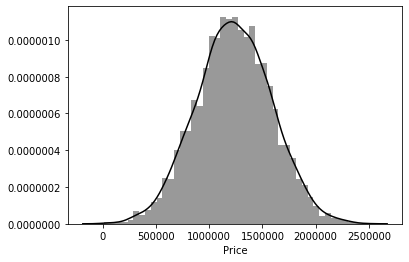

In [9]:
sns.distplot(USAhousing['Price'], color='black')
plt.show()

## As variáveis preditoras e a variável de resposta

Para treinar o modelo de regressão, primeiro precisaremos dividir nossos dados em uma matriz **X** que contenha os dados das variáveis preditoras e uma matriz **y** com os dados da variável de destino, nesse caso a coluna Preço. Vamos descartar a coluna Endereço, pois ela possui apenas informações de texto que o modelo de regressão linear não pode usar.

### Matrizes X e y

In [9]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

## Relação entre as variáveis preditoras


### Algumas questões importantes
Quando realizamos regressão linear múltipla, estamos interessados em algumas questões importantes:
1. Pelo menos um dos preditores ***x1, x2, ... ,x5***  é útil na previsão da resposta?
2. Todos os preditores ajudam a explicar **y**, ou apenas um subconjunto dos preditores?
3. Quão bem o modelo se ajusta aos dados?
4. Dado um conjunto de valores de previsão, quais valores de resposta devemos prever e quais as métricas indicam um bom modelo de previsão?

### Verificando as questões 1 e 2



**Gráficos simples de dispersão**

Pelos gráficos abaixo percebemos que a variável preditora 'Avg. Area Income' possui uma relação linear com menor dispersão dos dados em relação a nossa variável de resposta 'Price'.

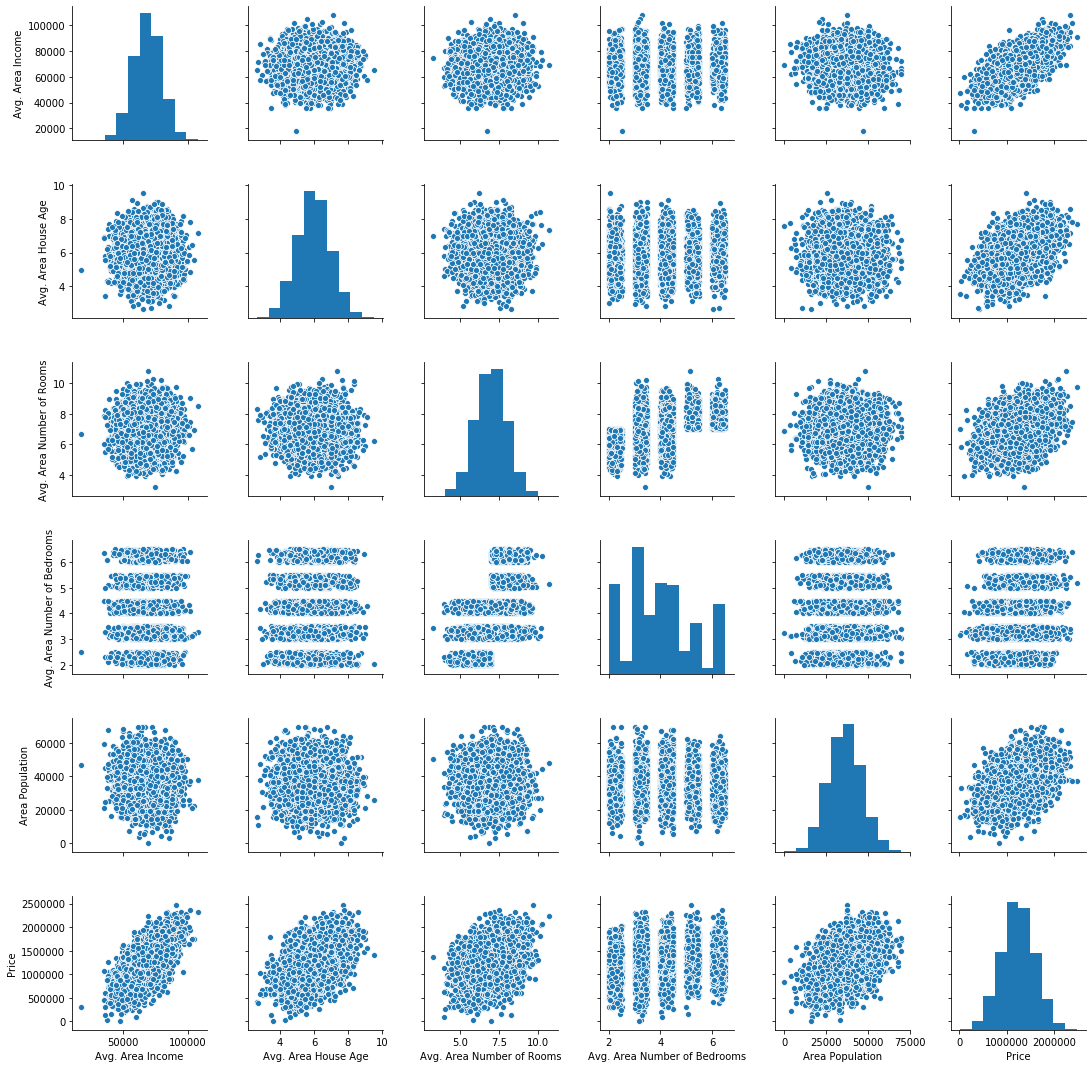

In [11]:
sns.pairplot(USAhousing)
plt.show()

**Mapa de Calor**

O gráfico abaixo mostra através de uma escala de cores a correlação entre as variáveis do *Dataset*. Se observarmos as cores deste gráfico, a variável preditora **'Avg. Area Income'** possui maior correlação com a variável de resposta **'Price'** e a variável **'Avg. Area Number of Bedrooms'** a menor.

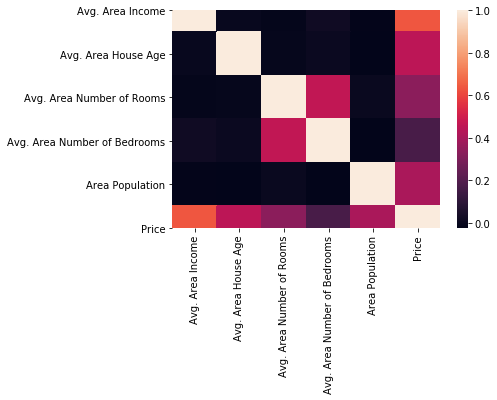

In [9]:
sns.heatmap(USAhousing.corr())
plt.show()

## Separando os dados de treinamento e de validação

Agora vamos dividir os dados em um conjunto de treinamento e um conjunto de testes. Vamos treinar o modelo no conjunto de treinamento, em seguida, usar o conjunto de teste para validar o modelo.

Em nosso exemplo iremos separar de forma randômica 33% dos dados para validação. Estes dados não serão utilizados para determinação dos coeficientes preditores do modelo. 


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

## Criando o Modelo de Regressão Linear Multivariável

Onde ***xj*** representa as variáveis preditoras e ***βj*** o coeficiente destas variáveis. Estes coeficientes quantificam a associação entre essas variáveis e a resposta. Nós interpretamos ***βj*** como a média efeito em **y** de um aumento de uma unidade em ***xj***, mantendo todos os outros preditores fixos: 

**y = β0 + β1 × x1 + β2 × x2 + ... + β5 × x5**

No exemplo da estimação do preço de venda dos imóveis temos o seguinte modelo:


**Price = β0 + β1 × 'Avg. Area Income' + β2 ×'Avg. Area House Age' + ... + β5 × 'Area Population'**

NOTA: A teoria para a determinação dos coeficientes do modelo encontra-se no capítulo 3.2 do Livro texto.


### Regressão Linear dos mínimos quadrados ordinários

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lm = LinearRegression()

In [14]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Avaliando o modelo

Vamos avaliar o modelo verificando seus coeficientes e como podemos interpretá-los.

In [15]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
Avg. Area Income                  21.642680
Avg. Area House Age           165227.889797
Avg. Area Number of Rooms     121886.318611
Avg. Area Number of Bedrooms    1446.725402
Area Population                   15.240921

Mantendo as demais variáveis fixas:

- Um aumento de 1 unidade de **'Avg. Area Income'** está associado a um incremento no preço do imóvel de \$21.52.
- Um aumento de 1 unidade de **'Avg. Area House Age'** está associado a um incremento no preço do imóvel de \$ $164883.28.
- Um aumento de 1 unidade de **'Avg. Area Number of Rooms'** está associado a um incremento no preço do imóvel de \$122368.67.
- Um aumento de 1 unidade de **'Avg. Area Number of Bedrooms'** está associado a um incremento no preço do imóvel de \$2233.80.
- Um aumento de 1 unidade de **'Area Population'** está associado a um incremento no preço do imóvel de \$15.15.





## Previsões do modelo

Vamos avaliar as previsões do nosso conjunto de testes!

In [16]:
predictions = lm.predict(X_test)

### Distribuição dos dados do modelo pelos dados de teste

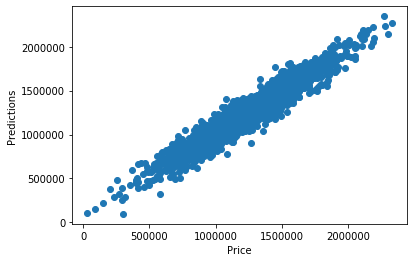

In [17]:
plt.scatter(y_test,predictions)
plt.xlabel('Price')
plt.ylabel('Predictions')
plt.show()

## Métricas de Avaliação

Aqui estão três métricas comuns de avaliação para problemas de regressão:


- **Erro Médio Absoluto** (MAE): é a média do valor absoluto dos erros.

- **Erro Quadrático Médio** (MSE): é a média do quadrado dos erros.

- **Raiz do Erro Médio Quadrático** (RMSE): é a raiz da média do quadrado dos erro.


O objetivo é sempre minimizar estas funções de Erro.


In [21]:
from sklearn import metrics

In [22]:
MAE = metrics.mean_absolute_error(y_test, predictions)

In [24]:
print('MAE_NORMALIZADO:', MAE/y.mean())
print('MSE_NORMALIZADO:', metrics.mean_squared_error(y_test, predictions)/y.mean())
print('RMSE_NORMALIZADO:', np.sqrt(metrics.mean_squared_error(y_test, predictions))/y.mean())

MAE_NORMALIZADO: 0.0663748822837269
MSE_NORMALIZADO: 8385.590733009652
RMSE_NORMALIZADO: 0.08249899764625879


### **MAE e RMSE - Qual métrica é melhor?**
****VER APÊNDICE

##  Validação Cruzada com k seções (k-Fold CV)

O K-Fold CV é o local em que um determinado conjunto de dados é dividido em um número K de seções / dobras, onde cada dobra é usada como um conjunto de testes em algum momento. Vamos pegar o cenário de validação cruzada de 5 vezes (K = 5). Aqui, o conjunto de dados é dividido em 5 dobras. Na primeira iteração, a primeira dobra é usada para testar o modelo e o restante é usado para treinar o modelo. Na segunda iteração, a segunda dobra é usada como o conjunto de testes, enquanto o restante serve como o conjunto de treinamento. Esse processo é repetido até que cada dobra das 5 dobras tenha sido usada como conjunto de teste.

 <img src='k_fold.png' />

Faremos uma validação cruzada para verificar esse comportamento. Os dados serão divididos em 5 grupos.

In [25]:
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [26]:
scores = []
best_lm = LinearRegression()
kf = KFold(n_splits=5, random_state=30, shuffle=False)

In [27]:
print ("Tamanho de X:",len(X), "\n")

for train_index, test_index in kf.split(X):
    #print("Train Index: ", train_index,len(train_index))
    #print("Test Index: ", test_index, len(test_index),"\n")
    
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    
    best_lm.fit(X_train,y_train)
    predictions = best_lm.predict(X_test)
     
    MAE = metrics.mean_absolute_error(y_test, predictions)
    print("MAE: ",MAE)
    print('MAE_NORMALIZADO:', MAE/y.mean())
    
    resultado = cross_val_score(best_lm, X_test, y_test, cv = 5)
    print("SCORE: ",resultado.mean())
    
    coeff_df = pd.DataFrame(best_lm.coef_,X.columns,columns=['Coefficient'])
    print(coeff_df,"\n\n\n\n\n ")
    

Tamanho de X: 5000 

MAE:  80458.23930459908
MAE_NORMALIZADO: 0.0653031613306974
SCORE:  0.9160164588216835
                                Coefficient
Avg. Area Income                  21.575051
Avg. Area House Age           165483.252702
Avg. Area Number of Rooms     120234.313874
Avg. Area Number of Bedrooms    2863.642681
Area Population                   15.300839 




 
MAE:  84256.0981781121
MAE_NORMALIZADO: 0.06838565720522576
SCORE:  0.919673338169388
                                Coefficient
Avg. Area Income                  21.428819
Avg. Area House Age           166641.425789
Avg. Area Number of Rooms     121840.997622
Avg. Area Number of Bedrooms    1375.214987
Area Population                   15.119496 




 
MAE:  79821.80016120586
MAE_NORMALIZADO: 0.0647866015797335
SCORE:  0.9147436580304806
                                Coefficient
Avg. Area Income                  21.650729
Avg. Area House Age           164980.478518
Avg. Area Number of Rooms     120975.577348
A

**Conclusão**



**Sugestão:** Visite o site www.kaggle.com e poste o seu notebook com a solução para o *Dataset* "USA_Housing.csv".

